In [0]:
#Importing Libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

## Importing Datasets

In [0]:
#Importing datasets from google drive 
from google.colab import drive 
drive.mount('/content/gdrive')

In [0]:
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/data.csv')

In [5]:
df.head()

,NumPreg,PlasmaGlucose,DiastolicBP,TricepSkin,BodyMassIndex,Pedigree,Age,Diabetic
0,5,86,68,28,30.2,0.364,24,No
1,7,195,70,33,25.1,0.163,55,Yes
2,5,77,82,41,35.8,0.156,35,No
3,0,165,76,43,47.9,0.259,26,No
4,0,107,60,25,26.4,0.133,23,No


In [6]:
df.shape

(200, 8)

In [7]:
# check for missing values
df.isna().sum()

NumPreg          0
PlasmaGlucose    0
DiastolicBP      0
TricepSkin       0
BodyMassIndex    0
Pedigree         0
Age              0
Diabetic         0
dtype: int64

In [8]:
# check the type of the datas
df.dtypes

NumPreg            int64
PlasmaGlucose      int64
DiastolicBP        int64
TricepSkin         int64
BodyMassIndex    float64
Pedigree         float64
Age                int64
Diabetic          object
dtype: object

In [10]:
# check for occurence of class
df.groupby('Diabetic').size()

Diabetic
No     132
Yes     68
dtype: int64

## Visualizing the Datasets

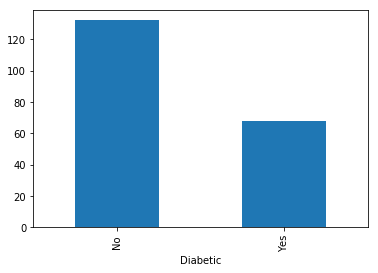

In [11]:
# plot the groups
df.groupby('Diabetic').size().plot(kind="bar")

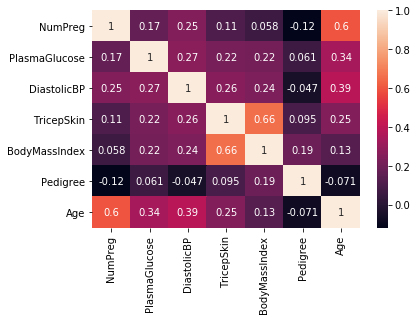

In [13]:
# check for correlation between input_data and labesl/outcomes
corr = df.corr()

# plot a heatmap
sns.heatmap(corr, annot=True)

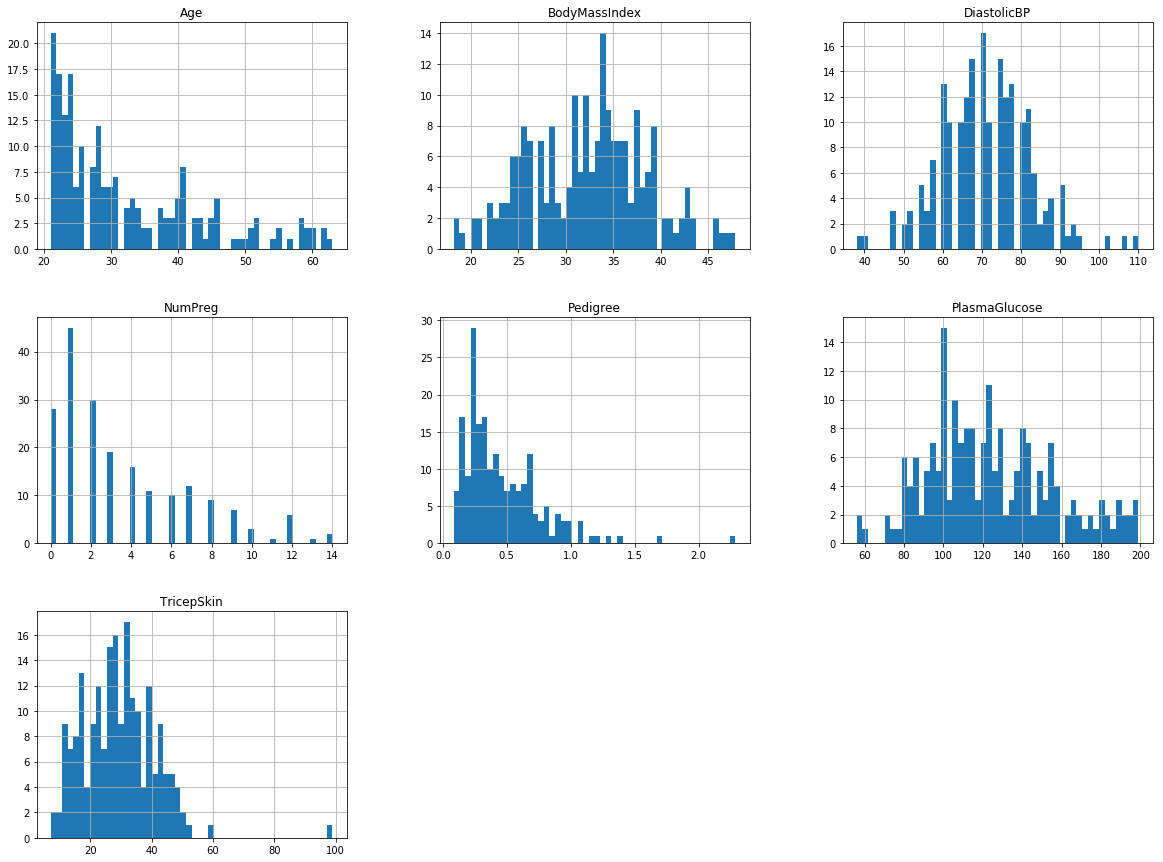

In [14]:
# Data viz for entire datasets
df.hist(bins=50, figsize=(20, 15))
plt.show()

## Datasets Statistics


In [15]:
# Descriptive analysis Transpose
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NumPreg,200.0,3.570000,3.366268,0.000,1.0000,2.0000,6.000,14.000
PlasmaGlucose,200.0,123.970000,31.667225,56.000,100.0000,120.5000,144.000,199.000
DiastolicBP,200.0,71.260000,11.479604,38.000,64.0000,70.0000,78.000,110.000
TricepSkin,200.0,29.215000,11.724594,7.000,20.7500,29.0000,36.000,99.000
BodyMassIndex,200.0,32.310000,6.130212,18.200,27.5750,32.8000,36.500,47.900
Pedigree,200.0,0.460765,0.307225,0.085,0.2535,0.3725,0.616,2.288
Age,200.0,32.110000,10.975436,21.000,23.0000,28.0000,39.250,63.000


In [16]:
df['DiastolicBP'].min()

38

In [17]:
df.columns

Index([u'NumPreg', u'PlasmaGlucose', u'DiastolicBP', u'TricepSkin',
       u'BodyMassIndex', u'Pedigree', u'Age', u'Diabetic'],
      dtype='object')

In [0]:
# separate the Input data
X = df.iloc[:, 0:7]

In [21]:
X.head()

,NumPreg,PlasmaGlucose,DiastolicBP,TricepSkin,BodyMassIndex,Pedigree,Age
0,5,86,68,28,30.2,0.364,24
1,7,195,70,33,25.1,0.163,55
2,5,77,82,41,35.8,0.156,35
3,0,165,76,43,47.9,0.259,26
4,0,107,60,25,26.4,0.133,23


In [0]:
# sepate the labels
Y = df['Diabetic']

## Scaling the Datasets

In [24]:
# scale the dataset
from sklearn.preprocessing import MinMaxScaler as Scaler
scaler = Scaler()
X = scaler.fit_transform(X)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [26]:
X

array([[0.35714286, 0.20979021, 0.41666667, ..., 0.4040404 , 0.12664548,
        0.07142857],
       [0.5       , 0.97202797, 0.44444444, ..., 0.23232323, 0.03540626,
        0.80952381],
       [0.35714286, 0.14685315, 0.61111111, ..., 0.59259259, 0.03222878,
        0.33333333],
       ...,
       [0.        , 0.34965035, 0.44444444, ..., 0.71380471, 0.23604176,
        0.02380952],
       [0.07142857, 0.43356643, 0.27777778, ..., 0.50841751, 0.07989106,
        0.04761905],
       [0.57142857, 0.69230769, 0.33333333, ..., 0.53198653, 0.20789832,
        0.5952381 ]])

In [0]:
col_names = ["NumPreg","PlasmaGlucose", "DiastolicBP", "TricepSkin", "BodyMassIndex" ,"Pedigree", "Age"]

In [0]:
#Converted into Dataframe
X = pd.DataFrame(X, columns=col_names)

In [32]:
X.head()

,NumPreg,PlasmaGlucose,DiastolicBP,TricepSkin,BodyMassIndex,Pedigree,Age
0,0.357143,0.209790,0.416667,0.228261,0.404040,0.126645,0.071429
1,0.500000,0.972028,0.444444,0.282609,0.232323,0.035406,0.809524
2,0.357143,0.146853,0.611111,0.369565,0.592593,0.032229,0.333333
3,0.000000,0.762238,0.527778,0.391304,1.000000,0.078983,0.119048
4,0.000000,0.356643,0.305556,0.195652,0.276094,0.021788,0.047619


## Splitting the Datasets

In [0]:
# splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=63)

In [90]:
#Check the splitted shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 7), (40, 7), (160,), (40,))

In [111]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=10)
log_reg.fit(X_train,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [112]:
# print the score
print("Accuracy Score of Logisitic Regression::", log_reg.score(X_test, y_test))

('Accuracy Score of Logisitic Regression::', 0.825)


### So I am getting an approx accuracy of 0.825. Since the datasets are very less that's why I am getting low values. But we can improve this model accuracy by changing some parameter values like test_size in train_test_split function and random_state values which is used for random sampling.

## Predicting the test values

In [0]:
predict = log_reg.predict(X_test)

In [114]:
predict

array(['No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No'],
      dtype=object)

In [0]:
from sklearn import metrics
acc_score = metrics.accuracy_score(y_test, predict)

In [116]:
acc_score

0.825

## Finding optimal threshold values

In [0]:
C_param_range = [0.001,0.01,0.1,1,10,100,1000, 100000]

acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
acc_table['C_parameter'] = C_param_range

j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 68)
    lr.fit(X_train,y_train)
    
    # Predict using model
    y_pred = lr.predict(X_test)
    
    # Saving accuracy score in table
    acc_table.iloc[j,1] = metrics.accuracy_score(y_test,y_pred)
    j += 1

In [118]:
acc_table 

,C_parameter,Accuracy
0,0.001,0.65
1,0.010,0.65
2,0.100,0.65
3,1.000,0.8
4,10.000,0.825
5,100.000,0.825
6,1000.000,0.825
7,100000.000,0.825


As we can see from above table after C=10 the accuracy values are constant or it saturated. So we can say that C=10 is the optimal points for the given datasets.